# Dataset size and model complexity

So far we've looked at the relationship between training dataset size and model performance. Now we'll add another dimension to the picture, and try to get a qualitative sense of how our training and validation curves vary as a function of model complexity—which in this case we'll operationalize as the number of predictors our linear regression estimator gets to use. 

To save ourselves a lot of code, we'll use a `plot_learning_curves` helper function I've written that wraps the `learning_curve` utility we used to produce the curves in the previous plot. It'll enale us to easily generate plots with multiple panels, where each panel shows the learning curve when plotted for a different dataset and/or estimator.

Let's start by asking how well we can predict age given our three different predictor sets—the domains, facets, and items, respectively. These sets contain 5, 30, and 300 features, respectively. We'll once again evaluate performance for sample sizes ranging from 100 to 50,000. For the time being, we'll stick with ordinary least-squares regression as our estimator.

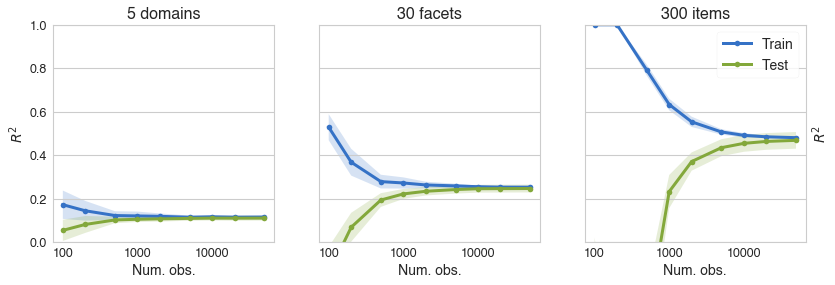

In [10]:
# the aforementioned plotting helper
from support import plot_learning_curves

# we'll compare performance for three different sets of predictors:
# the 5 domains, 30 facets, and 300 items. note the *X_sets
# notation; this is an advanced iterable unpacking trick that
# only works in Python 3. it lets the variable preceded by the
# star "swallow" any variables that aren't explicitly assigned.
*X_sets, age  = get_features(data, 'domains', 'facets', 'items', 'AGE')

# training sizes remain the same in our previous examples
train_sizes = [100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000]

# titles for each of the plot panels
labels = ['5 domains', '30 facets', '300 items']

# we pass plot_learning_curves an estimator, the list of feature
# #sets, the outcome variable, and the train_sizes and labels
plot_learning_curves(LinearRegression(), X_sets, age, train_sizes, labels=labels)

There are a couple of new points to note here:

1. Our ability to predict age varies dramatically depending on which features we use. Looking at the terminal point of each test curve (representing the K-fold cross-validated performance estimate at the largest sample size), we see that we do much better with 300 items than with 30 facets, and much better with the 30 facets than with just the 5 domains.

2. When sample size is small, we actually do a better job predictively using a smaller set of features. For example, at n = 500, we can explain about 20% of the variance in the test set using 30 facets, whereas our 300-item model is basically useless. By contrast, if we paid attention solely to the (overfitted) training set estimates, we would be misled into thinking that the 300-item model performs much better than the 30-facet model (~80% of the variance vs. 30%).

3. The point at which the training and test curves converge shifts systematically to the right with increasing model complexity.

Points (2) and (3) illustrate a general relationship between model complexity and dataset size: the more complex a model, the greater its capacity to learn from the data, but the more data we need in order to avoid overfitting. This tradeoff is unavoidable, and means that we need to think carefully (and conduct validation analyses like the one above!) when constructing our model.